# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

## Implementation

This is a demonstration of running a Mesa model in an IPython Notebook. The actual model and agent code are implemented in Schelling.py, in the same directory as this notebook. Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [1]:
import numpy as np
np.__file__

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sys
import numpy as np

from model import SchoolModel

import time
import glob
import os
import matplotlib
from Perc import *

matplotlib.rcParams.update({'font.size': 14})


mesa /Users/efiathieniti/anaconda3/lib/python3.7/site-packages/Mesa-0.8.5-py3.7.egg/mesa/__init__.py
mesa /Users/efiathieniti/anaconda3/lib/python3.7/site-packages/Mesa-0.8.5-py3.7.egg/mesa/__init__.py



Now we instantiate a model instance: a 10x10 grid, with an 80% change of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [2]:

def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="fast*minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="fast*%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print)

    return(filename_pattern)




## Model settings

In [3]:

import time
start_time = time.time()
# your code
all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})

all_models = []
all_model_agents = []
f=0.7
all_f = [0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6]
all_alpha = [0,0.2,0.4,0.6]

alpha_idx = pd.Index([0,0.2,0.4,0.6]) 
idx = pd.Index(all_f)
f0=0.6
f1=0.6
temp=0.4
minority_pc = 0.5
all_alpha = [0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5]
all_alpha = [0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5]
all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5, 0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,0.99,0.99]

all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5]
all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4]
all_alpha = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
all_f0_f1 = [0.1,0.6]
all_f0_f1 = [0.4,0.5,0.6,0.70,0.8,0.9]
all_f0_f1 = [0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_f0_f1 = [0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_f0_f1 = [0.01,0.1,0.2,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_alpha = [0.2,0.3]


all_f0_f1 = [0.7]


density = 0.9; num_schools = 64; minority_pc =  0.50; 
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;       
alpha =  0.2; temp =  0.10; cap_max =  1.01; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=False;radius=6; T=0.75;
school_moves_per_step=500; residential_moves_per_step=500;
i=0



num_steps=200

height=54;width=54;num_schools=16;
height=100;width=100;num_schools=64;


segregation_index= []
x2, x1 = 0,0
average_diff = 10

factor = "f0"
fs="eq"



## Run model

In [4]:

def run_simulation():
    i=0;
    all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
    all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})
    
    for f0 in all_f0_f1:

    #for alpha in all_alpha:
        model = SchoolModel(height=height, width=width, density=density, num_schools=num_schools,minority_pc=minority_pc, homophily=3,f0=f0,f1=f0,M0=M0,
                            M1=M1 , alpha=alpha, temp=temp,cap_max=cap_max,
                           move=move, symmetric_positions=symmetric_positions, residential_steps=residential_steps,
                            schelling=schelling, bounded=bounded, residential_moves_per_step=residential_moves_per_step,
                           school_moves_per_step=school_moves_per_step,radius=radius)
        
        
        
        # Stop if it did not change enough the last 70 steps

        while model.running and (model.schedule.steps < total_steps or average_diff>0.05) and model.schedule.steps<max_steps:
            model.step()
            segregation_index.append(model.seg_index)
            x2 = np.mean(segregation_index[-10:] )
            x1 = np.mean(segregation_index[-200:-190] )
            print(x2,x1)
            average_diff = (x2-x1)/x2
            print("steps ",model.schedule.steps)




        model_out = model.datacollector.get_model_vars_dataframe()
        model_out_agents = model.datacollector.get_agent_vars_dataframe()
        model_out_agents = model_out_agents[model_out_agents.type==2]
        model_out_agents = model_out_agents


        length = len(model_out)
        length_agents = len(model_out_agents)

        model_out['iter'] = np.repeat(i, length)
        model_out["f0"] = np.repeat(f0, length)
        model_out["f1"] = np.repeat(f1, length)
        model_out["alpha"] = np.repeat(alpha, length)
        model_out["res"]= np.repeat(residential_steps, length)

        model_out_agents['iter'] = np.repeat(i, length_agents)
        model_out_agents['f0'] = np.repeat(f0, length_agents)
        model_out_agents['f1'] = np.repeat(f1, length_agents)
        model_out_agents["alpha"] = np.repeat(alpha, length_agents)
        model_out_agents["res"] = np.repeat(residential_steps, length_agents)


        #all_models.append(model_out)
        all_models_df = all_models_df.append(model_out)
        all_model_agents_df = all_model_agents_df.append(model_out_agents)
        i+=1






    elapsed_time = time.time() - start_time

    all_models_df.index.name = 'Step'
    all_models_df = all_models_df.reset_index().set_index([factor, 'Step'])
    all_model_agents_df.index = pd.MultiIndex.from_tuples(all_model_agents_df.index, names=['Step', 'Id'])
    all_model_agents_df = all_model_agents_df.reset_index().set_index([factor, 'Step', 'Id'])  


    filename_pattern = get_filename_pattern()
    all_models_df.to_pickle("dataframes/models_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))

    all_model_agents_df.to_pickle("dataframes/agents_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))


    
    
    return([model_out, model_out_agents])


In [5]:
i=0;
all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})

for f0 in all_f0_f1:
    model = SchoolModel(height=height, width=width, density=density, num_schools=num_schools,minority_pc=minority_pc, homophily=3,f0=f0,f1=f0,M0=M0,
                        M1=M1 , alpha=alpha, temp=temp,
                       move=move, symmetric_positions=symmetric_positions, residential_steps=residential_steps,
                        schelling=schelling, bounded=bounded, residential_moves_per_step=residential_moves_per_step,
                       school_moves_per_step=school_moves_per_step,radius=radius)

    # Stop if it did not change enough the last 70 steps

    while model.running and (model.schedule.steps < total_steps or average_diff>0.05) and model.schedule.steps<max_steps:
        model.step()
        segregation_index.append(model.seg_index)
        x2 = np.mean(segregation_index[-10:] )
        x1 = np.mean(segregation_index[-200:-190] )
        print(x2,x1)
        average_diff = (x2-x1)/x2
        print("steps ",model.schedule.steps)




    model_out = model.datacollector.get_model_vars_dataframe()
    model_out_agents = model.datacollector.get_agent_vars_dataframe()
    model_out_agents = model_out_agents[model_out_agents.type==2]
    model_out_agents = model_out_agents


    length = len(model_out)
    length_agents = len(model_out_agents)

    model_out['iter'] = np.repeat(i, length)
    model_out["f0"] = np.repeat(f0, length)
    model_out["f1"] = np.repeat(f1, length)
    model_out["alpha"] = np.repeat(alpha, length)
    model_out["res"]= np.repeat(residential_steps, length)

    model_out_agents['iter'] = np.repeat(i, length_agents)
    model_out_agents['f0'] = np.repeat(f0, length_agents)
    model_out_agents['f1'] = np.repeat(f1, length_agents)
    model_out_agents["alpha"] = np.repeat(alpha, length_agents)
    model_out_agents["res"] = np.repeat(residential_steps, length_agents)


    #all_models.append(model_out)
    all_models_df = all_models_df.append(model_out)
    all_model_agents_df = all_model_agents_df.append(model_out_agents)
    i+=1






elapsed_time = time.time() - start_time

all_models_df.index.name = 'Step'
all_models_df = all_models_df.reset_index().set_index([factor, 'Step'])
all_model_agents_df.index = pd.MultiIndex.from_tuples(all_model_agents_df.index, names=['Step', 'Id'])
all_model_agents_df = all_model_agents_df.reset_index().set_index([factor, 'Step', 'Id'])  


filename_pattern = get_filename_pattern()
all_models_df.to_pickle("dataframes/models_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))

all_model_agents_df.to_pickle("dataframes/agents_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))




NameError: name 'residential_steps' is not defined

## Save the agents positions

In [6]:
num_steps=0
factor='alpha'
residential_steps=1;total_steps =residential_steps+num_steps;max_steps=total_steps
[model_out, agents] = run_simulation()




TypeError: __init__() got an unexpected keyword argument 'num_schools'

In [7]:
agents

NameError: name 'agents' is not defined

In [8]:
model_out_agents

NameError: name 'model_out_agents' is not defined

In [9]:
agent

NameError: name 'agent' is not defined

In [10]:
positions = []
types = []
pd.pickle(agents.pos)    
    

AttributeError: module 'pandas' has no attribute 'pickle'

# Cprofile stats

In [11]:
import cProfile
import time
import pstats

num_steps=0
residential_steps =10;
total_steps =residential_steps+num_steps
max_steps=total_steps;
start_time=time.time()

cProfile.run("run_simulation()")
elapsed_time = time.time() - start_time
print(elapsed_time)



         11021 function calls (10909 primitive calls) in 0.008 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      122    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
       12    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
        1    0.000    0.000    0.008    0.008 <ipython-input-4-8fab85ef0f85>:2(run_simulation)
        1    0.000    0.000    0.008    0.008 <string>:1(<module>)
        8    0.000    0.000    0.000    0.000 __init__.py:221(iteritems)
        2    0.000    0.000    0.000    0.000 __init__.py:227(itervalues)
        6    0.000    0.000    0.000    0.000 __init__.py:275(u)
       42    0.000    0.000    0.000    0.000 __init__.py:291(strlen)
        4    0.000    0.000    0.000    0.000 _methods.py:34(_sum)
        8    0.000    0.000    0.000    0.000 _methods.py:42(_any)
      106    0.000    0.000    0.000    0.000 abc.py:137(__in

TypeError: __init__() got an unexpected keyword argument 'num_schools'

In [ ]:
start_time=time.time()

cProfile.run("run_simulation()")
elapsed_time = time.time() - start_time
print(elapsed_time)



In [12]:
import cProfile

num_steps=1
residential_steps =10;
total_steps =residential_steps+num_steps
max_steps=total_steps;
cProfile.run("run_simulation()")



         11021 function calls (10909 primitive calls) in 0.008 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      122    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
       12    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
        1    0.000    0.000    0.008    0.008 <ipython-input-4-8fab85ef0f85>:2(run_simulation)
        1    0.000    0.000    0.008    0.008 <string>:1(<module>)
        8    0.000    0.000    0.000    0.000 __init__.py:221(iteritems)
        2    0.000    0.000    0.000    0.000 __init__.py:227(itervalues)
        6    0.000    0.000    0.000    0.000 __init__.py:275(u)
       42    0.000    0.000    0.000    0.000 __init__.py:291(strlen)
        4    0.000    0.000    0.000    0.000 _methods.py:34(_sum)
        8    0.000    0.000    0.000    0.000 _methods.py:42(_any)
      106    0.000    0.000    0.000    0.000 abc.py:137(__in

TypeError: __init__() got an unexpected keyword argument 'num_schools'

In [ ]:
num_steps=200
residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

In [13]:

i=0; residential_steps =120;

total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

TypeError: __init__() got an unexpected keyword argument 'num_schools'

In [14]:
num_steps=200
i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

TypeError: __init__() got an unexpected keyword argument 'num_schools'

In [15]:
num_steps=120
i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+20
run_simulation()

TypeError: __init__() got an unexpected keyword argument 'num_schools'

## Load previous simulations

In [16]:



segregation_index= []
x2, x1 = 0,0
average_diff = 10

factor = "f0"#radius=7
#cap_max=1.01
filename_pattern = get_filename_pattern()
filename_pattern




density = 0.90; num_schools = 64; minority_pc =  0.50; 
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;       
alpha =  0.2; temp =  0.10; cap_max =  1.01; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=False;radius=6; T=0.75;
school_moves_per_step=2000; residential_moves_per_step=2000;
i=0



num_steps=120

height=54;width=54;num_schools=16;
height=100;width=100;num_schools=64;


segregation_index= []
x2, x1 = 0,0
average_diff = 10

factor = "f0"
fs="eq"


In [17]:
compare = 'res'
dfs = []
i=0
num_steps=120
residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+20

num_steps=120
residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+20

filename_pattern = get_filename_pattern()
filename_pattern_to_find= filename_pattern + '*'
print(filename_pattern_to_find)
for name in glob.glob("dataframes/*models_*" + filename_pattern_to_find):
    try:
        print(name)

        new_df = pd.read_pickle(name)
        new_df["res"] = np.repeat(residential_steps, len(new_df))
        new_df["iter1"] = np.repeat(i, len(new_df))
        new_df["move"] = np.repeat(move, len(new_df))

        dfs.append(new_df)
        i+=1
    except:
        pass
    
residential_steps=0
total_steps =residential_steps+num_steps
max_steps=total_steps+20

filename_pattern = get_filename_pattern()
filename_pattern_to_find= filename_pattern +'*'

for name in glob.glob("dataframes/*models_*"+ filename_pattern_to_find):
    try:
        print(name)
        new_df = pd.read_pickle(name)
        new_df["res"] = np.repeat(residential_steps, len(new_df))
        new_df["iter1"] = np.repeat(i, len(new_df))
        new_df["move"] = np.repeat(move, len(new_df))

        #if len(new_df)>=num_steps:
        dfs.append(new_df)
        i+=1
    except:
        pass
all_models_df=pd.concat(dfs)

compare = "move"
compare = "radius"
# move='deterministic'
# residential_steps=0
# M0=1.0 ;M1=1.0
# num_steps=280
# filename_pattern = get_filename_pattern()
# filename_pattern_to_find= filename_pattern + '*'

# for name in glob.glob("dataframes/all_models_df_" + filename_pattern_to_find):
#     print(name)
    
#     new_df = pd.read_pickle(name)
#     new_df["res"] = np.repeat(residential_steps, len(new_df))
#     new_df["iter1"] = np.repeat(i, len(new_df))
#     new_df["move"] = np.repeat(move, len(new_df))

#     dfs.append(new_df)
#     i+=1
 


# residential_steps=200
# M0=1 ;M1=1
# num_steps=400


# filename_pattern = get_filename_pattern()
# filename_pattern_to_find= filename_pattern + '*'

# for name in glob.glob("dataframes/all_models_df_"+ filename_pattern_to_find):
#     print(name)
#     new_df = pd.read_pickle(name)
#     new_df["res"] = np.repeat(residential_steps, len(new_df))
#     new_df["iter1"] = np.repeat(i, len(new_df))
#     new_df["move"] = np.repeat(move, len(new_df))

#     #if len(new_df)>=num_steps:
#     dfs.append(new_df)
#     i+=1
# all_models_df=pd.concat(dfs)

# all_models_df=all_models_df.reset_index()
# #all_models_df = all_models_df.drop(columns=factor).reset_index()


fast*f0_minority=0.50_M0=0.80_M1=0.80_temp_0.10_height_100_steps_120_move_boltzmann_sym_True_res_120_schools_64_alpha_0.20_den_0.90_schell_False_school_mps_2000_res_mps_2000_bounded_False_radius_6_cp_1.01_T_0.75_fs_0.00*


ValueError: No objects to concatenate

## Varying alpha

In [18]:
all_models_df = all_models_df.reset_index()
all_models_df=all_models_df.sort_values(by=['iter','iter1',factor,'Step'])
all_models_df['school_step'] = all_models_df['Step']-all_models_df['res']


KeyError: 'iter1'

In [ ]:

from collections import Counter
indexes = []
for ind2, model_out_dummy in all_models_df.groupby('res'):
    for ind, model_out in model_out_dummy.groupby(['iter','iter1', factor]):
        indexes.append(ind[2])
    
    print(Counter(indexes))
    
all_models_df['school_step'] = all_models_df['Step'] -all_models_df['res']


# Agents utilities

# Initial utilities histogram

In [27]:
results = map(int, satisfactions)


NameError: name 'satisfactions' is not defined

In [28]:
for i in np.array(np.array(satisfactions).flatten()).flatten():
    print(np.mean(np.array(i)))
satisfactions = model_out[model_out.school_step==step].satisfaction.values
print(np.mean(satisfactions.values))

NameError: name 'satisfactions' is not defined

(120, 0, 0)


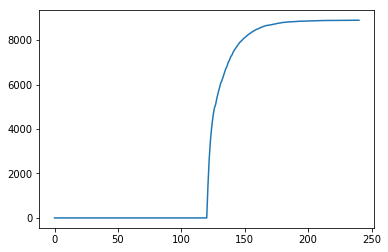

(120, 0, 0)


AttributeError: 'DataFrame' object has no attribute 'satisfaction'

In [29]:
# is the number of people satified distorted?


for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    mean_sat = []
    print(ind)
    plt.plot(model_out.happy, label='happy')
    plt.show()
    
    print(ind)
    #plt.plot(model_out.res_happy, label='happy')
    plt.show()
    
    for step in model_out.school_step:
        satisfactions = (model_out[model_out.school_step==step].satisfaction).values[0]
        #print(np.mean(satisfactions))
        mean_sat.append(np.mean(np.array(satisfactions)))
    plt.plot(mean_sat, label=ind[0])
    plt.legend()
    plt.show()
    
   

# snapshots
for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    mean_sat = []
    print(ind)
    for step in model_out.school_step[1::5]:
        satisfactions = (model_out[model_out.school_step==step].satisfaction).values[0]
        #print(np.mean(satisfactions))
        print(model_out[model_out.school_step==step].happy)
        mean_sat.append(np.mean(np.array(satisfactions)))
        plt.hist(satisfactions, label=str(ind[0]))
        plt.title("step %s"%step)
        plt.legend()
        plt.show()


    


In [30]:

for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    try:
        if ind[0]>0:
            plt.hist(model_out[model_out.Step==1].res_satisfaction, label=str(ind[0])+"res", alpha=0.5, color='C0')
            plt.legend()
            plt.show()  
        
            plt.hist(model_out[model_out.school_step==1].satisfaction, label=str(ind[0])+"school", alpha=0.5, color='C1')
            plt.legend()
            plt.show()

            
        else:
            plt.hist(model_out[model_out.school_step==1].satisfaction, label=str(ind[0])+"school", alpha=0.5, color='C2')
            plt.legend()
            plt.show()

    except:
        pass
#         plt.hist(model_out[model_out.Step==1].res_satisfaction, alpha=0.5, label="radius=1")
#         plt.vlines(x=0.6, linestyles='--',ymin=0, ymax=900)
#         plt.legend()
#         plt.show()
plt.show()


In [31]:

for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    
# do by step !!
    for step in model_out.Step:
        
        plt.hist(model_out[step].satisfaction, label=ind[0])
    plt.legend()
    plt.show()
    

KeyError: 0

In [32]:

for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    plt(model_out.Step, model_out.res_satisfaction)    
    plt.legend()

AttributeError: 'DataFrame' object has no attribute 'res_satisfaction'

In [33]:

for ind, model_out in all_models_df.groupby(['res','iter','iter1']):
    plt.hist(model_out.pi_jm[1][:,0], alpha=0.5, label="radius=6")
    plt.hist(model_out.pi_jm_fixed[1][:,0], alpha=0.5, label="radius=1")
    plt.vlines(x=0.6, linestyles='--',ymin=0, ymax=900)
    plt.legend()
    plt.show()

    plt.hist(model_out.pi_jm[residential_steps][:,0], alpha=0.5, label="var")
    plt.hist(model_out.pi_jm_fixed[residential_steps][:,0], alpha=0.5, label="fixed")
    plt.legend()

AttributeError: 'DataFrame' object has no attribute 'pi_jm'

In [34]:
print(pi_jm)

NameError: name 'pi_jm' is not defined

## Trajectory plots - over time

In [278]:
import matplotlib
from collections import OrderedDict
factor_to_plot="seg_index"
# dataframe select alpha or f to plot
plt.show()


def plot_trajectories(factor_to_plot):
    cmaps = [matplotlib.cm.get_cmap('Blues'),matplotlib.cm.get_cmap('Greens')]
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    all_models_df2 = []
    all_models_df2 = all_models_df[all_models_df.f0>0.5]
    #all_models_df2 = all_models_df[all_models_df.residential_segregation<0.4]

    for ind, model_out in all_models_df2.groupby(['res','iter','iter1']):
        factor_val=np.array(model_out[factor])[0]
        resid = model_out.res

        if ind[0] ==0:
            cmap = matplotlib.cm.get_cmap('Blues')
        else:
            cmap = matplotlib.cm.get_cmap('Greens')

        color = cmap(factor_val)
        label = str(factor_val)+' - ' +str(ind[0])
        plt.plot(model_out['school_step'],model_out[factor_to_plot],color=color, label=label, 
                 linewidth=factor_val*10, alpha=0.7)
        plt.title('%s_varying-%s \n'%(factor_to_plot,factor) 
                  + r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,  M0, M1, height, width,) 
                  +"\n"+ r'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d, schelling=%s'%(temp, move, symmetric_positions, residential_steps, num_schools,schelling))

    plt.legend()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('Steps')
    plt.ylabel('School segregation')


    plt.tight_layout()
    plt.savefig("plots/residential_non_random_%s_varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_schell_%s_cap_%.2f.png"%(factor_to_plot,factor,
                                                                        minority_pc, f0,f1,  M0, M1, temp, height,num_steps, move,symmetric_positions, residential_steps, num_schools,schelling,cap_max)
               ,bbox_inches="tight")  
    plt.show()

In [279]:

factor_to_plot='residential_segregation'

plot_trajectories(factor_to_plot)

factor_to_plot='seg_index'

plot_trajectories(factor_to_plot)

factor_to_plot='res_seg_index'

plot_trajectories(factor_to_plot)


KeyError: 'school_step'

<Figure size 800x480 with 0 Axes>

In [315]:
factor_to_plot = 'residential_segregation'

all_models_df_filtered = all_models_df[all_models_df['res']>1]

all_models_df_filtered['school_step'].tail(700)

def plot_average_trajectory(factor_to_plot, ymax=1):
    """
    factor_to_plot
    ymax: limit the axis to this value if given
    
    """
        
    plt.figure(num=None, figsize=(8, 6))    
    if ymax:
        plt.ylim([0,ymax])
    

    for ind, model_out in all_models_df_filtered.groupby(['res']):
        
        
        #factor_val=np.array(model_out[factor])[0]
        resid = model_out.res
        print(np.array(model_out[factor])[0])
        factor_val=np.array(model_out[factor])[0]

        if ind ==0:
            cmap = matplotlib.cm.get_cmap('Blues')
        else:
            cmap = matplotlib.cm.get_cmap('Greens')

        model_out_means =model_out.groupby([factor, 'school_step']).mean().reset_index()
        for factor_index, model_out_new in model_out_means.groupby([factor]):
            #if factor_index==0.7:
            color = cmap(factor_index)
            label = str(factor_index) + ' - ' + str(ind)
            plt.plot(model_out_new['school_step'],model_out_new[factor_to_plot],color=color, label=label,alpha=0.5,  
                                    linewidth=factor_index*5)

            plt.legend()
            move_s = move if move != 'boltzmann' else 'logit'

            plt.title('%s '%(factor_to_plot))
                      #  + r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,  M0, M1, height, width,) 
                      #    +"\n"+ r'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d'%(temp, move_s, symmetric_positions, ind, num_schools))


            
            txtt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,M0,M1, height, width) +\
                      "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d,\n schools=%d, alpha=%.2f, schelling=%s'%(temp, move_s, symmetric_positions, residential_steps, num_schools, alpha,schelling) +\
                        "\n" + 'radius=%d, capacity=%.2f, T=%.2f'%(radius, cap_max, T)


    plt.tight_layout()    
    plt.figtext(0.5, -0.15, txtt, wrap=True, horizontalalignment='center', fontsize=12)
    
            
            
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='f - res')

    plt.xlabel('Steps')
    plt.ylabel('School segregation')

    plt.tight_layout()
    plt.savefig("plots/Means_%s_residential_non_random_varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_cap_%.2f.png"%(factor_to_plot,factor,

                                                                        minority_pc,f0,f1,  M0, M1, temp, height,num_steps, move,symmetric_positions,
                                                                        ind, num_schools,cap_max)
               ,bbox_inches="tight")  
    plt.show()

0.45


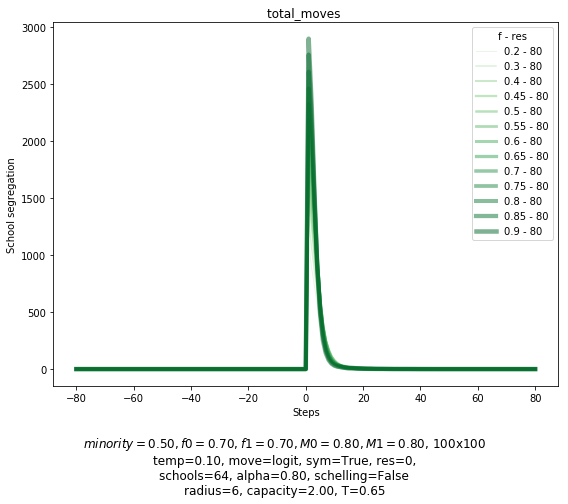

0.45


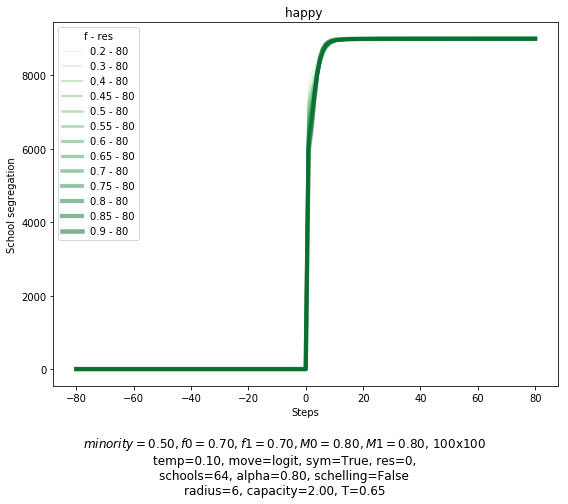

In [316]:
factor_to_plot='total_moves'
plot_average_trajectory(factor_to_plot, ymax=False)

factor_to_plot='happy'
plot_average_trajectory(factor_to_plot, ymax=False)

0.45


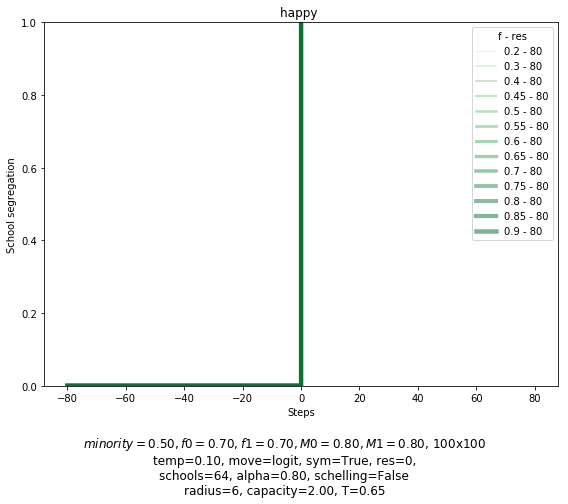

0.45


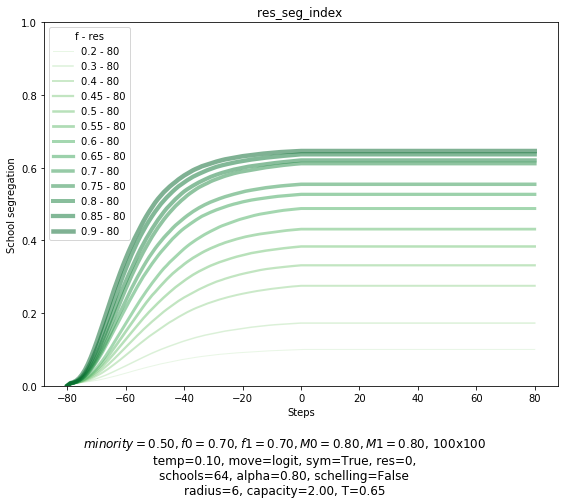

0.45


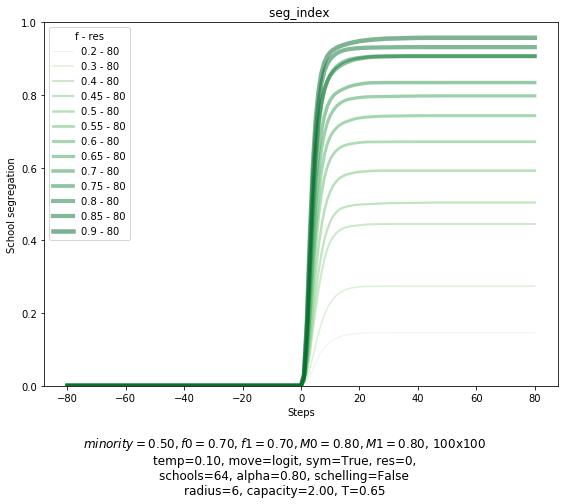

0.45


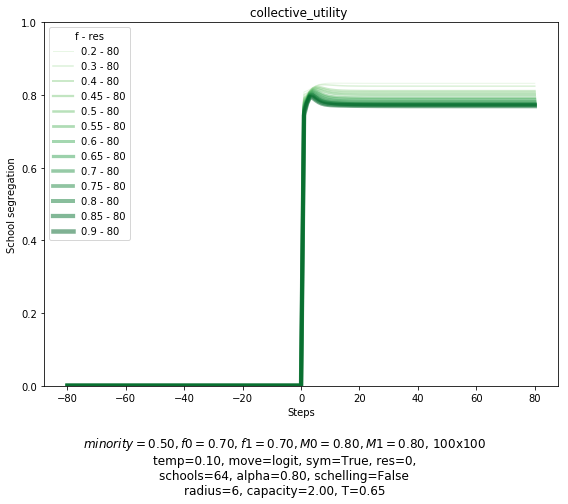

0.45


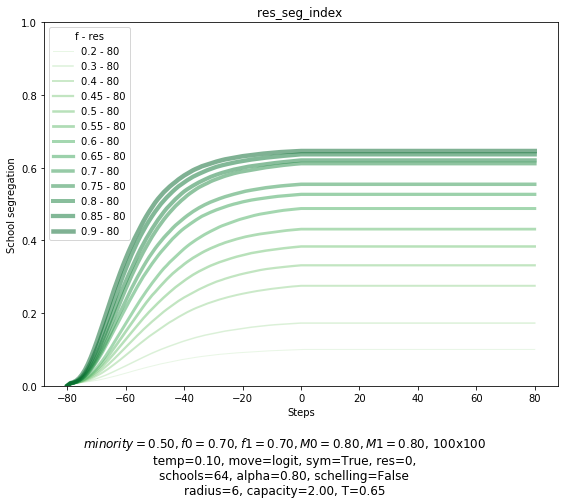

In [317]:

plot_average_trajectory(factor_to_plot)

factor_to_plot='res_seg_index'
plot_average_trajectory(factor_to_plot)

factor_to_plot ='seg_index'
plot_average_trajectory(factor_to_plot)


factor_to_plot ='collective_utility'
plot_average_trajectory(factor_to_plot)



factor_to_plot='res_seg_index'
plot_average_trajectory(factor_to_plot)



In [194]:
factor_to_plot = 'residential_segregation'

all_models_df_filtered = all_models_df[all_models_df['res']>=0]

all_models_df_filtered['school_step'].tail(700)

def plot_average_trajectory(factor_to_plot):
    plt.figure(num=None, figsize=(8, 6))
    for ind, model_out in all_models_df_filtered.groupby(['res']):
        #factor_val=np.array(model_out[factor])[0]
        resid = model_out.res
        print(np.array(model_out[factor])[0])
        factor_val=np.array(model_out[factor])[0]

        if model_out.res.iloc[0] ==0:
            cmap = matplotlib.cm.get_cmap('Blues')
        else:
            cmap = matplotlib.cm.get_cmap('Greens')

        model_out_means =model_out.groupby([factor, 'school_step']).mean().reset_index()
        #alpha=(model_out_new.res.iloc[0]+1)
        for factor_index, model_out_new in model_out_means.groupby(factor):
            color = cmap(factor_index)
            if factor_index >0.3 and factor_index<0.65:
               # plt.plot(model_out_new['school_step'],model_out_new[factor_to_plot],color=color, label=''+factor_index+ind,alpha=0.5,  
                #                 linewidth=factor_index*5)

                print(ind)
                model_out_new_school=model_out_new[model_out_new.res==0]
                plt.plot(model_out_new_school['Step'],model_out_new_school[factor_to_plot], "--x", color=color,label="school"+str(factor_index), 
                                 linewidth=factor_index*5)
                model_out_new_res=model_out_new[model_out_new.res>0]

                plt.plot(model_out_new_res['Step'],model_out_new_res['res_seg_index'], "--o",color=color,label="res"+str(factor_index),  
                                 linewidth=factor_index*5)
                
                #label=str('res')+str(factor_index)+str(ind)
            plt.legend()
            plt.xlim([0,120])
            plt.title('%s_varying-%s \n'%(factor_to_plot,factor) 
                      + r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,  M0, M1, height, width,) 
                      +"\n"+ r'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d'%(temp, move, symmetric_positions, residential_steps, num_schools))

        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('Steps')
    plt.ylabel('School segregation')

    print(factor_to_plot,factor,minority_pc,f0,f1,  M0, M1, temp, height,num_steps, move,symmetric_positions,
                                                                        residential_steps, num_schools)

    plt.tight_layout()
    plt.savefig("plots/Means_%s_residential_non_random_varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d.png"%(factor_to_plot,factor,

                                                                        minority_pc,f0,f1,  M0, M1, temp, height,num_steps, move,symmetric_positions,
                                                                        residential_steps, num_schools)
               ,bbox_inches="tight")  
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.45
0
0
0
0
0
0.45
80
80
80
80
80
seg_index f0 0.5 0.7 0.7 0.8 0.8 0.1 100 80 boltzmann True 0 64


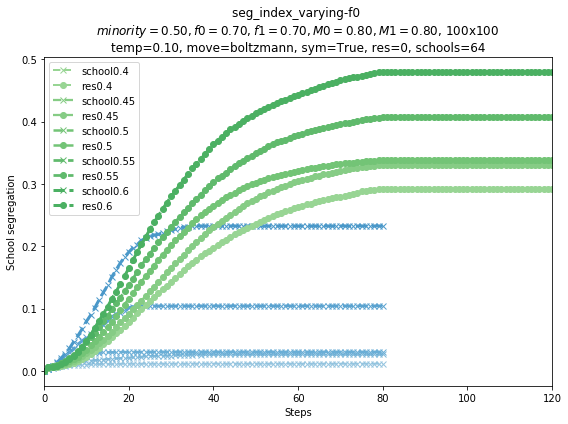

In [195]:

factor_to_plot ='seg_index'
plot_average_trajectory(factor_to_plot)




## Compare residential and school


In [247]:
factor_to_plot = 'residential_segregation'

all_models_df_filtered = all_models_df[all_models_df['res']<1]

all_models_df_filtered['school_step'].tail(700)

def plot_average_trajectory_both(factor_to_plot):
    for ind, model_out in all_models_df.groupby(['res']):
        #factor_val=np.array(model_out[factor])[0]
        resid = model_out.res



        model_out_means =model_out.groupby([factor, 'school_step']).mean().reset_index()
        for factor_index, model_out_new in model_out_means.groupby(factor):
            plt.plot(model_out_new['school_step'],model_out_new[factor_to_plot], label=factor_index, alpha=(model_out_new.res.iloc[0]+1), 
                     linewidth=factor_index*5)
            plt.legend()
            plt.title('%s_varying-%s \n'%(factor_to_plot,factor) 
                      + r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,  M0, M1, height, width,) 
                      +"\n"+ r'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d'%(temp, move, symmetric_positions, residential_steps, num_schools))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('Steps')
    plt.ylabel('School segregation')


    plt.tight_layout()
    plt.savefig("plots/Means_%s_residential_non_random_varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d.png"%(factor_to_plot,factor,

                                                                        minority_pc,f0,f1,  M0, M1, temp, height,num_steps, move,symmetric_positions,
                                                                        residential_steps, num_schools))  
    plt.show()

## Compare with residential and no residential, 2 plots

In [342]:
# problem is the neighbourhood does not increase enough....
# all_models_df = all_models_df.reset_index()
# all_models_df=all_models_df.sort_values(by=['iter','iter1',factor,'Step'])


x_axis = factor

all_models_df_filtered = all_models_df[all_models_df.res>=0]
all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'residential_segregation'
all_models_df_filtered['school_step'] = all_models_df_filtered['Step']-all_models_df_filtered['res']


index_num=0

def plot_average(all_models_df_filtered,sliced_, only_school=True, utility=False,filter_f=False, 
                 factors_to_plot= ["res", "var_res", "seg", "fixed_res"]):
    plt.figure(num=None, figsize=(8, 6))

    colors=['C0','C1','C2','C2','C4']

    sliced=[sliced_,sliced_+10]
    sliced_res=[20,7]

    #all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]
    #all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['Step'].isin(list(range(sliced_res[0],sliced_res[1]))+list(range(residential_steps+sliced[0],residential_steps+sliced[1])))]

    for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['res', 'move'])):
        print(ind)            
        color=colors[index_num]
#         if ind[0]>0:
#             all_models_df_1 = all_models_df_1[all_models_df_1['Step'].isin(list(range(80,90)+))]
#         else:
#             all_models_df_1 = all_models_df_1[all_models_df_1['school_step'].isin(list(range(sliced_,sliced_+10)))]

            
    
        final_seg = all_models_df_1.groupby([factor, 'iter','iter1']).tail(2).reset_index()
        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
        final_seg = final_seg.groupby([factor, 'iter','iter1']).mean().reset_index()

        seg = final_seg.groupby(factor).mean().reset_index()
        error = final_seg.groupby(factor).std().reset_index()   

        if filter_f:
            seg=seg[(seg[factor]<0.65) & (seg[factor]>0.2)]
            error=error[(error[factor]<0.65) & (error[factor]>0.2)]
        if utility:
            plt.errorbar(seg[factor], seg['collective_utility'],yerr= error['collective_utility'],fmt='-',label='utility'+str(ind[0]), color=color, capsize=5,markeredgewidth=2)
        
        else:
            for factor_to_plot in factors_to_plot:
                if factor_to_plot == "res":
                    plt.errorbar(seg[factor], seg["residential_segregation"], yerr=error["residential_segregation"],fmt='--x',label="neighbourhood"+str(ind[0]),color=color, capsize=5,markeredgewidth=2)

                elif factor_to_plot == "var_res":
                    plt.errorbar(seg[factor], seg['res_seg_index'],yerr= error['res_seg_index'],fmt='--o',label='var_res'+str(ind[0])+"r=%s"%(radius), color=color)

                elif factor_to_plot == "seg":
                    plt.errorbar(seg[factor], seg['seg_index'],yerr= error['seg_index'],fmt='-',label='school'+str(ind[0]), color=color, capsize=5,markeredgewidth=2)
                
                elif factor_to_plot == "fixed_res":
                    plt.errorbar(seg[factor], seg['fixed_res_seg_index'],yerr= error['fixed_res_seg_index'],fmt='--v',label='fixed_res'+str(ind[0]), color=color, capsize=5,markeredgewidth=2)
            
            

        plt.xlabel(x_axis)
        plt.ylabel('Segregation')
        plt.legend(title = "Segregation")
        plt.title('%s_varying-%s \n'%(factor_to_plot,factor))

        txtt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,M0,M1, height, width) +\
                      "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d,\n schools=%d, alpha=%.2f, schelling=%s, after %s steps'%(temp, move, symmetric_positions, residential_steps, num_schools, alpha,schelling,sliced[0]) +\
                        "\n" + 'radius=%d, capacity=%.2f, T=%.2f'%(radius, cap_max, T)


       

        filename_pat=get_filename_pattern()
    plt.tight_layout()    
    plt.figtext(0.5, -0.15, txtt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig("plots/"+ filename_pat +"_sl_%d_f_%s_%s.png"%(
                                                            sliced[0], filter_f, ''.join(factors_to_plot)),bbox_inches="tight")  
    

    
    


(0, 'boltzmann')
(120, 'boltzmann')


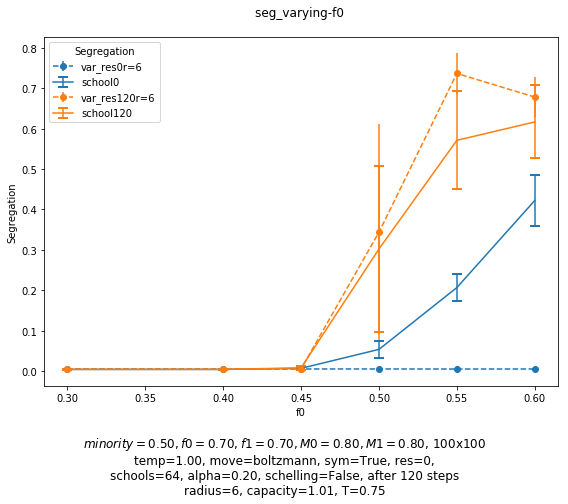

(0, 'boltzmann')
(120, 'boltzmann')
(0, 'boltzmann')
(120, 'boltzmann')


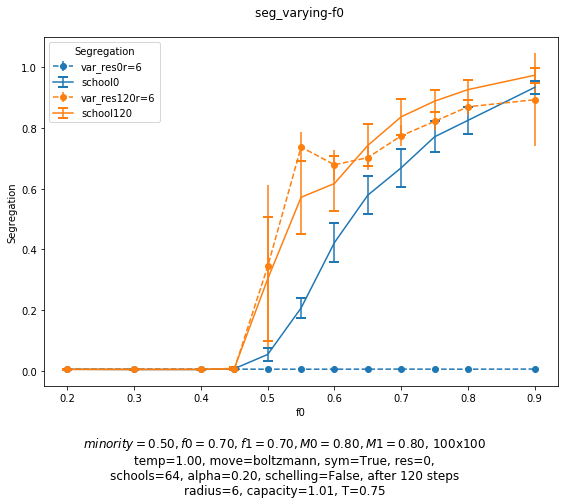

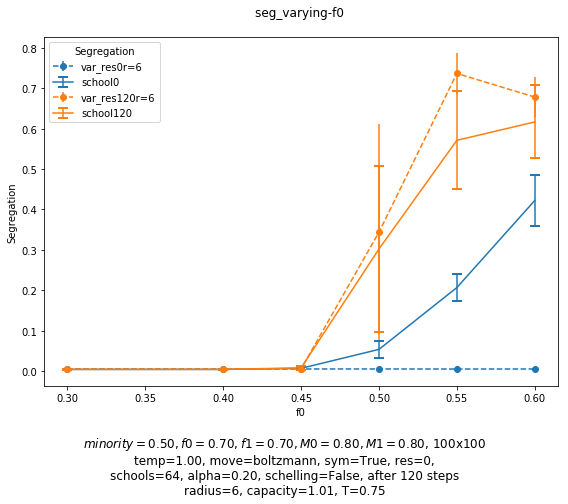

(0, 'boltzmann')
(120, 'boltzmann')


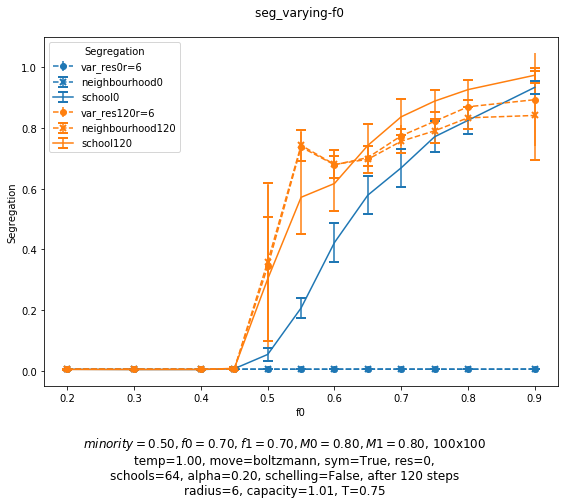

(0, 'boltzmann')
(120, 'boltzmann')


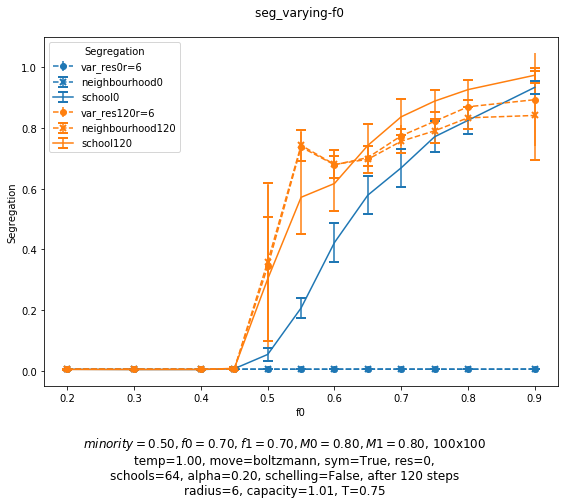

(0, 'boltzmann')
(120, 'boltzmann')


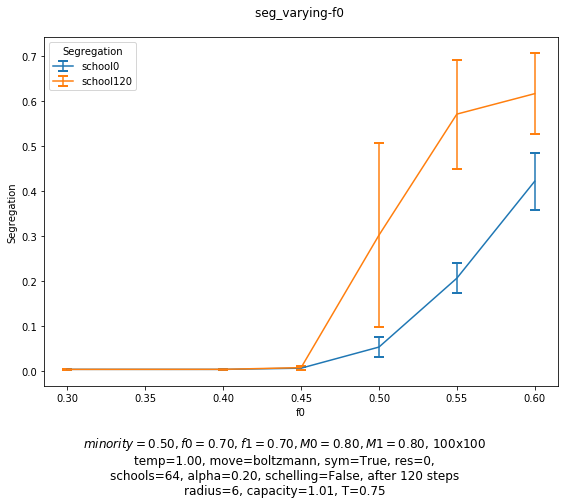

(0, 'boltzmann')
(120, 'boltzmann')


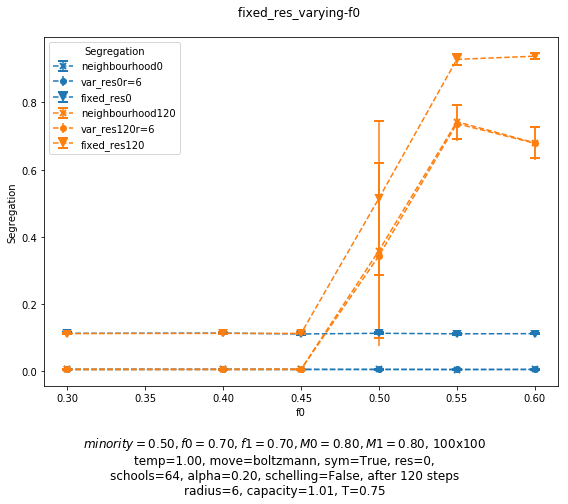

In [343]:
sliced_=num_steps
sliced_=600
num_steps
factors_to_plot= [ "var_res", "seg"]

plot_average(all_models_df_filtered,num_steps,only_school=False, utility=False, factors_to_plot=factors_to_plot, filter_f=True)
plt.show()
plot_average(all_models_df_filtered,num_steps,only_school=False, utility=False, factors_to_plot=factors_to_plot, filter_f=False)

factors_to_plot= [ "var_res", "seg"]

plot_average(all_models_df_filtered,120,only_school=False, utility=False,factors_to_plot=factors_to_plot,filter_f=True)
plt.show()

factors_to_plot= ["var_res","res", "seg"]

plot_average(all_models_df_filtered,120,only_school=False, utility=False,factors_to_plot=factors_to_plot,filter_f=False)
plt.show()


plot_average(all_models_df_filtered,num_steps,only_school=False, utility=False,factors_to_plot=factors_to_plot,filter_f=False)
plt.show()

factors_to_plot= [ "seg"]

plot_average(all_models_df_filtered,120,only_school=True, utility=False, factors_to_plot=factors_to_plot,filter_f=True)
plt.show()

factors_to_plot= [ "res", "var_res", "fixed_res"]
plot_average(all_models_df_filtered,120,only_school=True, utility=False, factors_to_plot=factors_to_plot,filter_f=True)
plt.show()



(0, 'boltzmann')
(120, 'boltzmann')


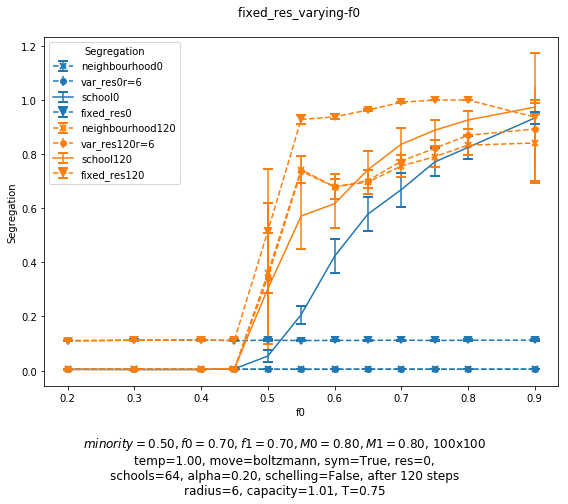

(0, 'boltzmann')
(120, 'boltzmann')


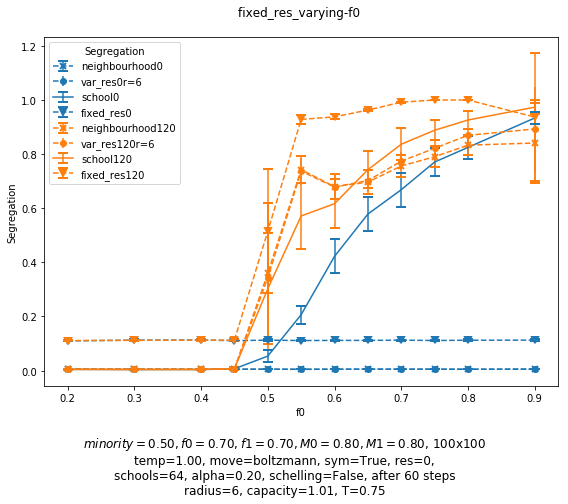

(0, 'boltzmann')
(120, 'boltzmann')


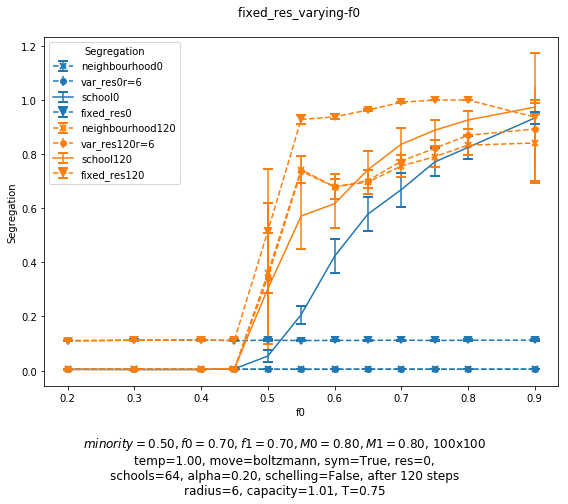

In [344]:
sliced_=num_steps
sliced_=600
num_steps
plot_average(all_models_df_filtered,num_steps,only_school=True)
plt.show()
plot_average(all_models_df_filtered,60,only_school=True)
plt.show()
plot_average(all_models_df_filtered,num_steps,only_school=True)

plt.show()

(0, 'boltzmann')


UnboundLocalError: local variable 'factor_to_plot' referenced before assignment

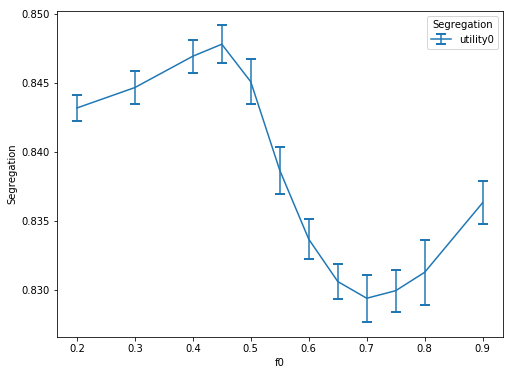

In [345]:
sliced_=num_steps
sliced_=600
num_steps


plot_average(all_models_df_filtered,num_steps,only_school=False, utility=True)
plt.show()

plot_average(all_models_df_filtered,60,only_school=False, utility=True, filter_f=True)
plt.show()

In [ ]:
plt.figure(num=None, figsize=(8, 6))

    colors=['C0','C1','C2','C2','C4']

    sliced=[sliced_,sliced_+10]

    all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]

    for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['res', 'move'])):
        print(ind)            
        color=colors[index_num]

        final_seg = all_models_df_1.groupby([factor, 'iter','iter1']).tail(100).reset_index()

        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
        final_seg = final_seg.groupby([factor, 'iter','iter1']).mean().reset_index()

        seg = final_seg.groupby(factor).mean().reset_index()
        error = final_seg.groupby(factor).std().reset_index()   


# Analysis of the compound effect

In [239]:
all_models_df_filtered

,f0,Step,agent_count,seg_index,residential_segregation,res_seg_index,fixed_res_seg_index,happy,percent_happy,total_moves,...,comp7,compositions,collective_utility,iter,f1,alpha,res,iter1,move,school_step
322,0.45,0,9064,0.000000,0.000000,0.000000,NaN,0,0,0,...,0,[],0.000000,0,0.7,0.8,80,16,boltzmann,-80
323,0.45,1,9064,0.000000,0.008239,0.006505,0.113832,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-79
324,0.45,2,9064,0.000000,0.012008,0.008351,0.117382,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-78
325,0.45,3,9064,0.000000,0.016344,0.009895,0.120312,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-77
326,0.45,4,9064,0.000000,0.022553,0.012108,0.125183,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-76
327,0.45,5,9064,0.000000,0.027092,0.013757,0.128888,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-75
328,0.45,6,9064,0.000000,0.034065,0.016333,0.135579,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-74
329,0.45,7,9064,0.000000,0.040339,0.018407,0.140487,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-73
330,0.45,8,9064,0.000000,0.046837,0.020882,0.145543,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-72
331,0.45,9,9064,0.000000,0.054991,0.023595,0.153387,0,0,0,...,66,"[76, 62]",0.000000,0,0.7,0.8,80,16,boltzmann,-71


In [240]:

colors=['C0','C1','C2','C2','C4']
sliced=[sliced_,sliced_+10]

#all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]

for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['move'])):
    print(ind)            
    color=colors[index_num]

    final_seg = all_models_df_1.groupby([factor, 'iter','iter1', 'res']).tail(100).reset_index()

    final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
    final_seg = final_seg.groupby([factor, 'iter','iter1', 'res']).mean().reset_index()

    seg = final_seg.groupby([factor, 'res']).mean().reset_index()
    error = final_seg.groupby([factor, 'res']).std().reset_index()
    
    print(seg)
    

boltzmann
      f0  res  iter  iter1     index   Step  agent_count  seg_index  \
0   0.20    0  12.0   24.5  16290.75   40.0       9064.0   0.077700   
1   0.20   80  12.0   19.0   6389.50  110.5       9064.0   0.064231   
2   0.30    0  11.0   24.5  16331.25   40.0       9064.0   0.138021   
3   0.30   80  11.0   19.0   6550.50  110.5       9064.0   0.107013   
4   0.40    0   9.0   24.5  16432.50   40.0       9064.0   0.220369   
5   0.40   80   9.0   19.0   6757.50  110.5       9064.0   0.177135   
6   0.45    0   0.0   24.5  16533.75   40.0       9064.0   0.281838   
7   0.45   80   0.0   19.0   6849.50  110.5       9064.0   0.224217   
8   0.50    0  10.0   24.5  16574.25   40.0       9064.0   0.336123   
9   0.50   80  10.0   19.0   7056.50  110.5       9064.0   0.277818   
10  0.55    0   1.0   24.5  16675.50   40.0       9064.0   0.396670   
11  0.55   80   1.0   19.0   7148.50  110.5       9064.0   0.324683   
12  0.60    0   3.0   24.5  16756.50   40.0       9064.0   0.476803

In [241]:
seg[seg.res==0]
seg[seg.res==120]

,f0,res,iter,iter1,index,Step,agent_count,seg_index,residential_segregation,res_seg_index,...,comp2,comp3,comp4,comp5,comp6,comp7,collective_utility,f1,alpha,school_step


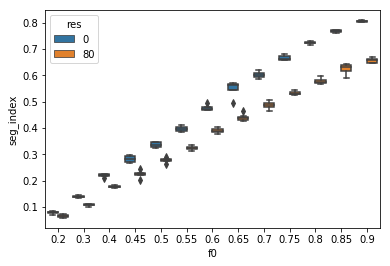

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x='f0',y='seg_index',data=final_seg,hue='res')

In [10]:
final_seg = all_models_df_1.groupby([factor, 'iter','iter1', 'res']).tail(100).reset_index()

final_seg.boxplot(by=factor, column='seg_index', grid=False)

NameError: name 'all_models_df_1' is not defined

## Sensitivity analysis

## Sensitivity analysis

In [19]:

#unbounded
density = 0.90; num_schools = 64; minority_pc =  0.50; 
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;       
alpha =  0.2; temp =  0.10; cap_max =  1.01; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=False;radius=6; T=0.75;
school_moves_per_step=500; residential_moves_per_step=500;
i=0


#bounded
density = 0.9; num_schools = 64; minority_pc =  0.50;
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;
alpha =  0.5; temp =  0.1; cap_max =  1.01; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=True;radius=6;T=0.85;
school_moves_per_step=2000; residential_moves_per_step=2000;fs=0.5;variable_f=True;sigma=0.5;sample=5;
i=0


density = 0.9; num_schools = 64; minority_pc =  0.50;
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;
alpha =  0.8; temp =  0.1; cap_max =2; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=True;radius=6;T=0.65;
school_moves_per_step=2000; residential_moves_per_step=2000;fs=0.5;variable_f=True;sigma=0.5;sample=1;
num_neighbourhoods=16; schools_per_neighbourhood=1;displacement=1;
i=0

num_steps=200

height=54;width=54;num_schools=16;
height=100;width=100;num_schools=64;


segregation_index= []
x2, x1 = 0,0
average_diff = 10

factor = "f0"
fs="eq"


In [20]:
def get_filename_pattern():
    if factor =="alpha":
        filename_pattern="varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fixed2"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T)

    if factor =='f0':
        filename_pattern="varying_%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fixed2"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T)

    return(filename_pattern)


def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="varying_%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print)

    return(filename_pattern)



def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="fast*_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="fast*%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print)

    return(filename_pattern)



def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="fast*_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="fast*%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print)

    return(filename_pattern)


def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="fixs*_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="fixs*%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print)

    return(filename_pattern)


def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0
        
    if factor =="alpha":
        filename_pattern="*_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="*%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        residential_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T, fs_print,)

    return(filename_pattern)


# bounded neighbourhood model
# def get_filename_pattern():
#     fs_print = fs
#     if fs_print=="eq":
#         fs_print= 0

#     if factor =='f0':
#         filename_pattern="%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f_v%s"%(
#             factor,minority_pc, M0, M1, temp,height, num_steps,
#         move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
#         school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T,fs_print, str(variable_f)[0])

#     return(filename_pattern)





# # with sampling 

def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0

    if factor =="alpha":

        filename_pattern="fixs_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f_v%s_s%d"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T,fs_print, str(variable_f)[0],sample)

    return(filename_pattern)


def get_filename_pattern():
    fs_print = fs
    if fs_print=="eq":
        fs_print= 0

    if factor =="alpha":

        filename_pattern="fixs_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f_fs_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps,density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T,fs_print)

    if factor =='f0':
        filename_pattern="22222%s_m=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_h_%d_st_%d_move_%s_sym_%s_res_%d_a_%.2f_den_%.2f_schell_%s_s_mps_%d_r_mps_%d_bounded_%s_r_%d_cp_%.2f_T_%.2f_fs_%.2f_v%s_s%d_n%d_sn%d_d%d"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps,alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T,fs_print, str(variable_f)[0],sample, num_neighbourhoods, schools_per_neighbourhood, displacement)
    return(filename_pattern)


In [21]:
filename_pattern = get_filename_pattern()
filename_pattern

'22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_200_move_boltzmann_sym_True_res_0_a_0.80_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1'

In [22]:
compare = "move"
compare = "radius"
factor='f0'

dfs = []
residential_steps = 120
num_steps=200

factor_settings = { "radius1": {"values": [3,5,6,7,9,11] },
                   "radius": {"values": [3,5,6,7,9,11] },
                    "T": {"values": [0.5,0.65, 0.7,0.75,0.8,0.85,0.9] },
                    #"T": {"values": [0.65]},
                   "cap_max": {"values": [1.01,1.1,2,1.5,5,10] },
                   "fs": {"values": [0.4,0.5,0.6,0.7]},
                  "density":{"values": [0.8,0.85,0.90,0.99]},
                  "temp":{"values": [0.02,0.1,0.5,1, 0.01]},
                "temp":{"values": [0.02,0.5,1, 0.01]},
                   "alpha":{"values": [0.7]},
                "alpha":{"values": [0.01,0.1,0.2,0.3,0.4,0.5, 0.6, 0.9]},
                #"alpha":{"values": [0.4]},
                   "residential_moves_per_step":{"values": [500,2000]},
                  "bounded":{"values": [True,False]},
                  "sigma":{"values":[0.3,0.5]},
                  "displacement":{"values":[1,4,8]}}


vary = "density";cap_max=1.01; T=0.75;radius = 6;

vary= "alpha";radius=6;density=0.9;fs="eq";temp=0.02;
vary = "fs";cap_max=1.01; T=0.75;radius = 6;density=0.9;temp=0.1;
vary="temp";fs="eq";den=0.9;temp=0.1;alpha=0.2;
vary = "fs";cap_max=1.01; T=0.75;radius = 6;density=0.9;temp=0.1;
vary= "alpha";radius=6;density=0.9;fs="eq";temp=0.1;
vary= "cap_max";radius=6;density=0.9;fs="eq";temp=0.1;

vary="temp";fs="eq";den=0.9;alpha=0.2;T=0.75;
vary= "alpha";radius=6;density=0.9;fs="eq";temp=0.1;
vary= "cap_max";radius=6;density=0.9;fs="eq";temp=0.1;

vary="temp";fs="eq";den=0.9;alpha=0.2;T=0.75;
#vary= "cap_max";radius=6;density=0.99;fs="eq";temp=0.1;
#vary = "radius";cap_max=1.01; T=0.75;density=0.90;alpha=0.2;temp=0.02;
#vary="temp";fs="eq";den=0.9;alpha=0.2;T=0.75;
vary= "alpha";radius=6;density=0.9;fs="eq";temp=0.1;
vary = "radius";cap_max=1.01; T=0.75;density=0.9;alpha=0.2;temp=0.1;
vary= "residential_moves_per_step";radius=6;density=0.9;fs="eq";temp=0.1;num_steps=120;T=0.85;

vary= "cap_max";cap_max=1.01; T=0.75;radius = 6;alpha=0.2;temp=0.1;density=0.9;residential_moves_per_step=2000;bounded=False;
#vary="temp";fs="eq";den=0.9;alpha=0.2;T=0.75;


# bounded neighbourhood model

density = 0.9; num_schools = 64; minority_pc =  0.50;
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;
alpha =  0.8; temp =  0.1; cap_max =2; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=True;radius=6;T=0.65;
school_moves_per_step=2000; residential_moves_per_step=2000;fs="eq";variable_f=True;sigma=0.5;sample=1;
num_neighbourhoods=16; schools_per_neighbourhood=2;displacement=1;residential_steps=80;

schools_per_neighbourhood=2; 

T=0.8;schools_per_neighbourhood=1;a=0.8;displacement=1;num_steps=80;
symmetric_positions = True;

vary="alpha"; T=0.65;
#vary="temp";alpha=0.8;T=0.8;
#vary="displacement";
#vary="sigma";
#vary= "T";

for factor_val in factor_settings[vary]["values"]:
    locals()[vary] = factor_val
    filename_pattern = get_filename_pattern()
    filename_pattern_to_find= filename_pattern + '*'
    print(filename_pattern)
    for name in glob.glob("dataframes/*odels*" + filename_pattern_to_find):
        try:
            print(name)
            new_df = pd.read_pickle(name)
            new_df["res"] = np.repeat(residential_steps, len(new_df))
            new_df["iter1"] = np.repeat(i, len(new_df))
            new_df[vary] = np.repeat(factor_val, len(new_df))
            new_df["move"] = np.repeat(move, len(new_df))
            dfs.append(new_df)
            i+=1
        except:
            print("failed ", name)



residential_steps = 0;  
for factor_val in factor_settings[vary]["values"]:
    locals()[vary] = factor_val
    filename_pattern = get_filename_pattern()
    filename_pattern_to_find= filename_pattern + '*'

    for name in glob.glob("dataframes/*odels*" + filename_pattern_to_find):
        print(name)
        try:
            print(name)
            new_df = pd.read_pickle(name)
            new_df["res"] = np.repeat(residential_steps, len(new_df))
            new_df["iter1"] = np.repeat(i, len(new_df))
            new_df[vary] = np.repeat(factor_val, len(new_df))
            new_df["move"] = np.repeat(move, len(new_df))
            
            dfs.append(new_df)
            i+=1
            #print(name)
        except:
            print("failed ", name)


    
all_models_df=pd.concat(dfs)


22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_80_move_boltzmann_sym_True_res_80_a_0.01_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1
22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_80_move_boltzmann_sym_True_res_80_a_0.10_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1
22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_80_move_boltzmann_sym_True_res_80_a_0.20_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1
22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_80_move_boltzmann_sym_True_res_80_a_0.30_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1
22222f0_m=0.50_M0=0.80_M1=0.80_temp_0.10_h_100_st_80_move_boltzmann_sym_True_res_80_a_0.40_den_0.90_schell_False_s_mps_2000_r_mps_2000_bounded_True_r_6_cp_2.00_T_0.65_fs_0.00_vT_s1_n16_sn1_d1
dataframes/models_22222f0_m=0.50_M0=0.80

In [23]:
all_models_df=all_models_df.reset_index()
all_models_df=all_models_df.sort_values(by=['iter','iter1',factor,'Step'])


In [24]:
# Residential_Sensitivity analysis
from collections import Counter
all_models_df_filtered1 = all_models_df[all_models_df.res>0]

indexes = []
for ind2, model_out_dummy in all_models_df_filtered1.groupby(['res', vary]):
    
    for ind, model_out in model_out_dummy.groupby(['iter','iter1', factor]):
        indexes.append(ind[2])
    
    print(ind2,Counter(indexes))
   

(80, 0.4) Counter({0.45: 3, 0.55: 3, 0.65: 3, 0.6: 3, 0.7: 3, 0.75: 3, 0.8: 3, 0.85: 3, 0.9: 3, 0.4: 3, 0.5: 3, 0.3: 3, 0.2: 3})
(80, 0.9) Counter({0.45: 9, 0.55: 9, 0.65: 9, 0.6: 9, 0.7: 9, 0.75: 9, 0.8: 9, 0.85: 9, 0.9: 9, 0.4: 9, 0.5: 9, 0.3: 9, 0.2: 9})


In [25]:
all_models_df[vary].unique()
#all_models_df=all_models_df[all_models_df['T']>0.6]

array([0.4, 0.9])

In [26]:
def normalize_color(x, values):
    minx = values.min()
    maxx = values.max()
    if minx!=maxx:
        if type(minx) == bool:
            minx = int(minx==True)
            maxx = int(maxx==True)
            x = int(x==True)
        a=0.5;b=1;
        xx = (b-a)*((x-minx)/(maxx-minx)) + a
    else:
        xx=1000
    return(xx)

   

In [27]:
json_filename = json.dumps({
        "factor": factor,
        "minority_pc": minority_pc,
        "M0":M0, "M1":M1, "temp":temp, "height":height, "num_steps":num_steps,
        "move":move,"symmetric_positions":symmetric_positions, "residential_steps":residential_steps,
        "alpha":alpha, "density":density,"schelling":schelling,
        school_moves_per_step:"school_moves_per_step", "residential_moves_per_step":residential_moves_per_step,
        "bounded":bounded,
        "radius":radius, "cap_max":cap_max,
        "T":T, "fs_print":fs_print, "variable_f": str(variable_f)[0],"sample":sample, "num_neighbourhoods":num_neighbourhoods,
        "schools_per_neighbourhood":schools_per_neighbourhood, "displacement":displacement
    }, sort_keys=True, indent=4)


NameError: name 'json' is not defined

In [28]:
# problem is the neighbourhood does not increase enough....
x_axis = factor


index_num=0

def plot_average_different_factors(all_models_df_filtered,sliced_, only_school=True, utility=False,filter_f=False, vary="radius",factors_to_plot = ["residential_segregation", "res_seg_index", "seg_index"]):
    
    if factor == "alpha":
        all_models_df_filtered = all_models_df_filtered[all_models_df_filtered.f0==0.6]
    fig = plt.figure(num=None, figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
    
    colors=['C0','C1','C2','C2','C4']

    sliced=[sliced_-2,sliced_+2]

    all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]

    

    for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['res', vary])):
        print(ind)


        normalized = normalize_color(ind[1], all_models_df_filtered[vary])

        if ind[0] ==0:
            cmap = matplotlib.cm.get_cmap('Blues')
        else:
            cmap = matplotlib.cm.get_cmap('Greens')
    

        color= cmap(normalized)
        
        print(color)

#         color = cmap( ( ((ind[1]-min_factor)/(max_factor-min_factor+0.1))*100) +0.5) # cap max
        
        
        
        final_seg = all_models_df_1.groupby([factor,vary,'iter','iter1']).tail(10).reset_index()

            
        group_size = final_seg.groupby([factor,vary,'iter','iter1']).size().mean()

        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
        final_seg = final_seg.groupby([factor,vary, 'iter','iter1']).mean().reset_index()

        seg = final_seg.groupby([factor,vary]).mean().reset_index()
        error = final_seg.groupby([factor,vary]).std().reset_index()   

        
        label = str(ind[1])
        seg.fixed_res_seg_index
        if filter_f:
            seg=seg[seg[factor]>0.4]
            error=error[error[factor]>0.4]
        if utility:
            plt.errorbar(seg[factor], seg['collective_utility'],yerr= error['collective_utility'],fmt='-',label='utility '+label, color=color, norm=normalize,capsize=5,markeredgewidth=2)
        
        for factor_to_plot in factors_to_plot:
            if factor_to_plot == "residential_segregation":
                s = ax.errorbar(seg[factor], seg[factor_to_plot], yerr=error[factor_to_plot],fmt='--x',label="neighbourhood "+label,color=color, capsize=5,markeredgewidth=2)
            elif factor_to_plot == "var_res":
                s = ax.errorbar(seg[factor], seg['res_seg_index'],yerr= error['res_seg_index'],fmt='--o',label='var_res  '+label, color=color)

            elif factor_to_plot == "seg_index":
                s = ax.errorbar(seg[factor], seg['seg_index'],yerr= error['seg_index'],fmt='-',label='school '+label + ' - '+ str(ind[0]), color=color, capsize=5,markeredgewidth=2)
            elif factor_to_plot == "fixed_res":
                s = ax.errorbar(seg[factor], seg['fixed_res_seg_index'],yerr= error['fixed_res_seg_index'],fmt='--v',label='fixed_res '+label, color=color, capsize=5,markeredgewidth=2)

                

        plt.xlabel(x_axis)
        plt.ylabel('Segregation')
        if "seg_index" in factors_to_plot:
            plt.legend(title = "index - " + vary + " - steps")
        else:
            plt.legend(title = "index - " + vary )

        #txtt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,M0,M1, height, width) +\
        #              "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d,\n schools=%d, alpha=%.2f, schelling=%s, after %s steps'%(temp, move, symmetric_positions, residential_steps, num_schools, alpha,schelling,sliced[0]) +\
        #                "\n" + 'radius=%d, capacity=%.2f, T=%.2f'%(radius, cap_max, T)
        if move == 'boltzmann':
            move_s = 'logit'
        else:
            move_s = move
        txtt= r'%dx%d,  schools=%d, $M=%.2f$, '%(height, width, num_schools, M0) +\
                      'temp=%.2f, move=%s \n sym=%s  alpha=%.2f, density=%.2f,'%(temp, move_s, symmetric_positions, alpha, density) +\
                        "\n" + 'radius=%d, capacity=%.2f, T=%.2f, reps=%d'%(radius, cap_max, T, group_size)+\
                    "\n" + ' schools_per_neighbourhood=%d, diplacement=%d'%(schools_per_neighbourhood,displacement )

        
        
        
        if "seg_index" in factors_to_plot:
            txtt+=", after %s steps"%(sliced[0])
            
    plt.tight_layout()
    plt.ylim([0,1.02])
    plt.figtext(0.5, -0.15, txtt, wrap=True, horizontalalignment='center', fontsize=12)
    #plt.colorbar(mappable=s,cmap=cmap, ax=ax)
    plt.savefig("plots/sens_var_%s_util_%s_min=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_h_%d_step_%d_move_%s_sym_%s_res_%d_sch_%d_a_%.2f_schell_%s_slice_%d_filter_%s_vary_%s_cp_%.2f_T_%.2f_sn%d_%s.png"%(factor,
                                                                            utility,minority_pc, final_seg.f0[0],final_seg.f1[1], M0, M1, temp, height,num_steps, move,
                                                                             symmetric_positions, final_seg.res[0], num_schools,
                                                                             alpha,schelling,sliced[0], filter_f,vary, cap_max, T,schools_per_neighbourhood, 
                                                                             ''.join(factors_to_plot)),bbox_inches="tight")  
    
    
    
    
    
    

/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


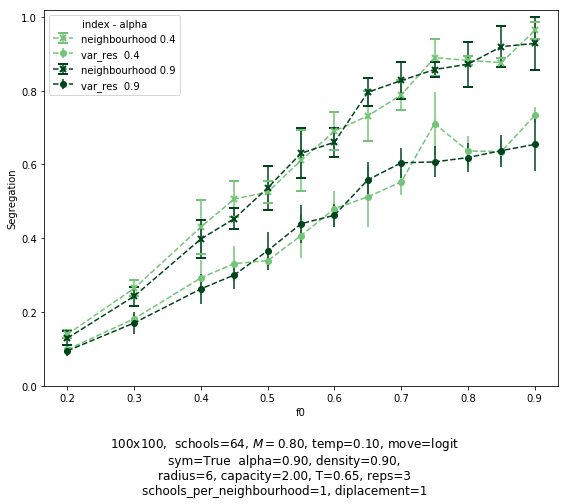

(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


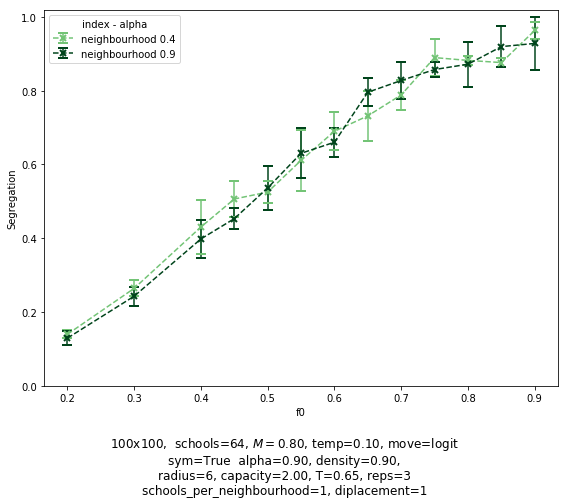

(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


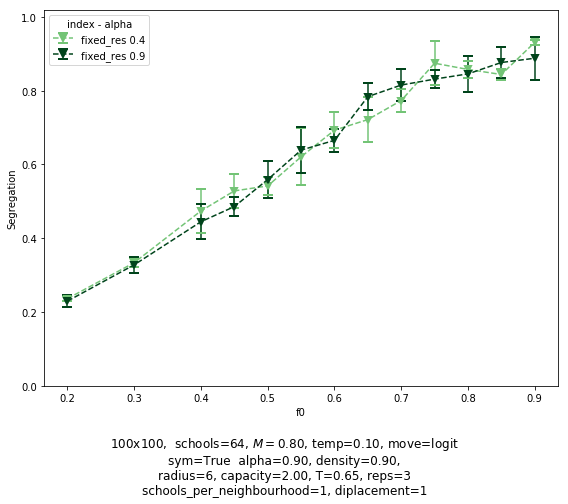

In [29]:

# factor='alpha'
# vary="move"


factor='f0';
all_models_df['school_step'] = all_models_df['Step'] -all_models_df['res']


all_models_df_filtered = all_models_df[all_models_df['res']>0]

all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'residential_segregation'
all_models_df_filtered['school_step'] = all_models_df_filtered['Step'] -all_models_df_filtered['res']



sliced_=num_steps
sliced_=600
num_steps
plot_average_different_factors(all_models_df_filtered,num_steps,only_school=False, vary=vary,factors_to_plot = ["residential_segregation", "var_res"])
plt.show()
#plot_average_different_factors(all_models_df_filtered,80,only_school=True,vary=vary,factors_to_plot = ["residential_segregation", "var_res"])
#plt.show()
#plot_average_different_factors(all_models_df_filtered,num_steps,only_school=True,vary=vary,factors_to_plot = ["residential_segregation", "var_res"])

#plt.show()

plt.show()
plot_average_different_factors(all_models_df_filtered,num_steps,only_school=True,vary=vary,factors_to_plot = ["residential_segregation"])
#plt.show()

#plot_average_different_factors(all_models_df_filtered,num_steps,only_school=True,vary=vary,factors_to_plot = ["var_res"])

plt.show()
plot_average_different_factors(all_models_df_filtered,num_steps,only_school=True,vary=vary,factors_to_plot = ["fixed_res"])


# school sensitivity - with and without residential

/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


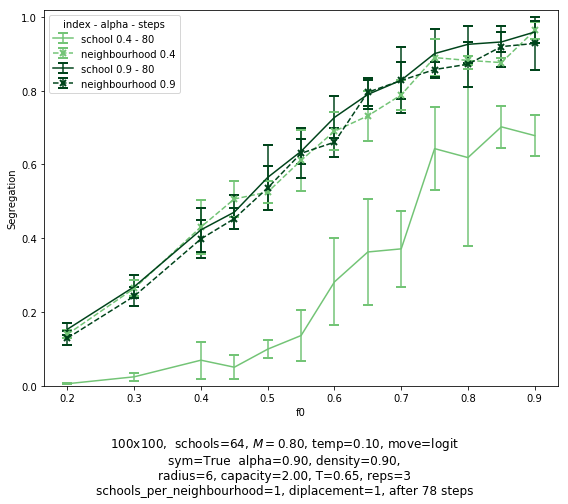

(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


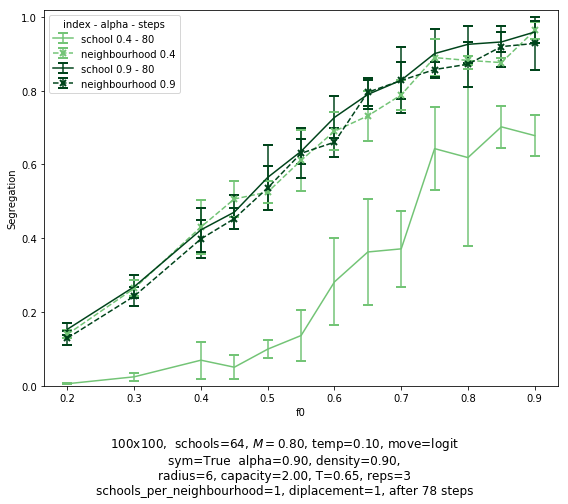

(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


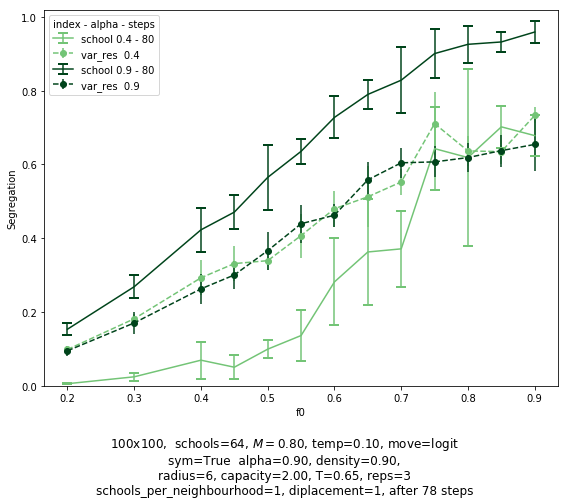

(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


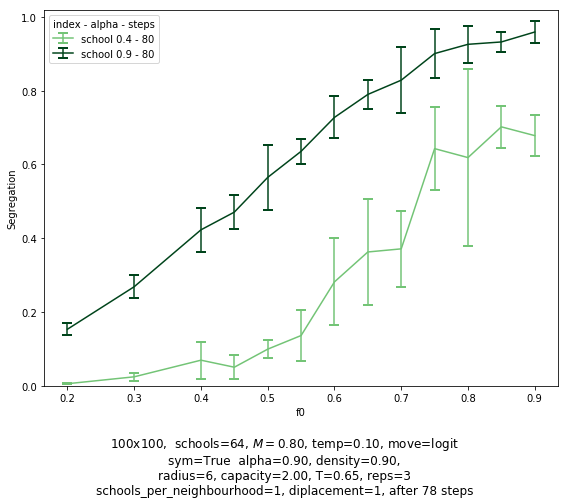

In [30]:

all_models_df_filtered = all_models_df[all_models_df.res>0]
#all_models_df_filtered = all_models_df_filtered[all_models_df_filtered.density<0.]

all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'residential_segregation'
all_models_df_filtered['school_step'] = all_models_df_filtered['Step'] -all_models_df_filtered['res']


sliced_=num_steps
sliced_=600
num_steps

plot_average_different_factors(all_models_df_filtered,80,only_school=False, vary=vary,factors_to_plot = [  "seg_index", "residential_segregation"])
plt.show()

plot_average_different_factors(all_models_df_filtered,80,only_school=True,vary=vary,factors_to_plot = ["seg_index", "residential_segregation"])
plt.show()



plot_average_different_factors(all_models_df_filtered,80,only_school=False,vary=vary,factors_to_plot = ["seg_index", "var_res"])
plt.show()
plot_average_different_factors(all_models_df_filtered,num_steps,only_school=False, vary=vary,factors_to_plot = [  "seg_index"])
plt.show()
#plot_average_different_factors(all_models_df_filtered,80,only_school=False,vary=vary,factors_to_plot = ["seg_index", "var_res"])
#plt.show()

(0, 0.4)
(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)
(0, 0.9)
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)
(80, 0.4)
(0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0)
(80, 0.9)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


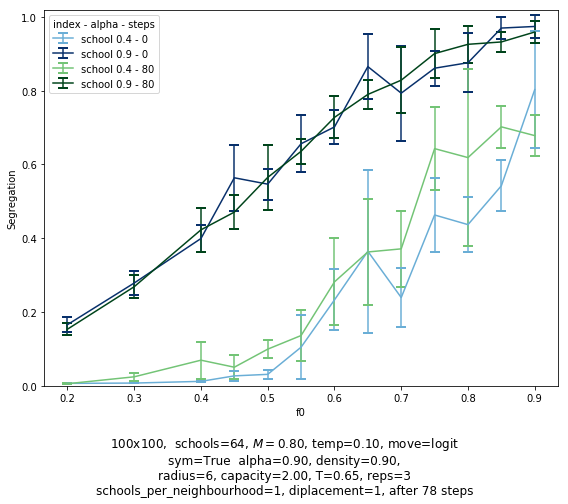

UnboundLocalError: local variable 'txtt' referenced before assignment

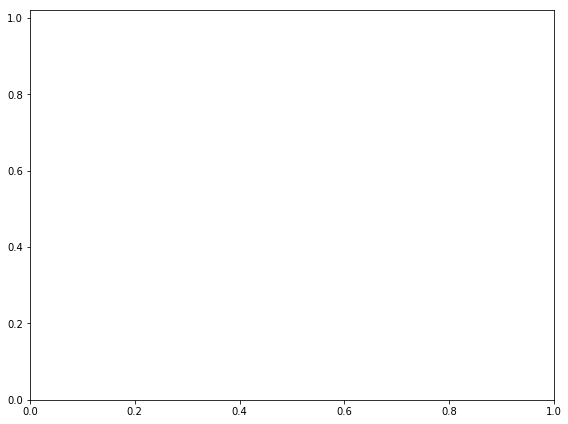

In [31]:

all_models_df_filtered = all_models_df[all_models_df.res>=0]
#all_models_df_filtered = all_models_df_filtered[all_models_df_filtered.density<0.]

all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'residential_segregation'
all_models_df_filtered['school_step'] = all_models_df_filtered['Step'] -all_models_df_filtered['res']


sliced_=num_steps
sliced_=600
num_steps
plot_average_different_factors(all_models_df_filtered,num_steps,only_school=False, vary=vary,factors_to_plot = [  "seg_index"])
plt.show()
plot_average_different_factors(all_models_df_filtered,120,only_school=False, vary=vary,factors_to_plot = [  "seg_index", "residential_segregation"])
plt.show()

plot_average_different_factors(all_models_df_filtered,120,only_school=True,vary=vary,factors_to_plot = ["seg_index", "residential_segregation"])
plt.show()



plot_average_different_factors(all_models_df_filtered,120,only_school=False,vary=vary,factors_to_plot = ["seg_index", "var_res"])
plt.show()

plot_average_different_factors(all_models_df_filtered,60,only_school=False,vary=vary,factors_to_plot = ["seg_index", "var_res"])
plt.show()

In [ ]:

def plot_average_different_factors_on_x(all_models_df_filtered,sliced_, only_school=True, utility=False,filter_f=False, vary="radius",factors_to_plot = ["residential_segregation", "res_seg_index", "seg_index"]):
    
 
    plt.figure(num=None, figsize=(8, 6))

    colors=['C0','C1','C2','C2','C4']

    sliced=[sliced_,sliced_+10]

    all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]

    

    for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['res', vary])):
        print(ind)
#         if ind[0] ==0:
#             color = 'C0'
#         else:
#             color= 'C1'
#         print(ind)

        normalized = normalize_color(ind[1], all_models_df_filtered[vary])

        if ind[0] ==0:
            cmap = matplotlib.cm.get_cmap('Blues')
        else:
            cmap = matplotlib.cm.get_cmap('Greens')
    

        color= cmap(normalized)
        
        print(color)

#         color = cmap( ( ((ind[1]-min_factor)/(max_factor-min_factor+0.1))*100) +0.5) # cap max
        
        
        
        final_seg = all_models_df_1.groupby([factor,vary,'iter','iter1']).tail(10).reset_index()

        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
        final_seg = final_seg.groupby([factor,vary, 'iter','iter1']).mean().reset_index()

        seg = final_seg.groupby([factor,vary]).mean().reset_index()
        error = final_seg.groupby([factor,vary]).std().reset_index()   

        seg.fixed_res_seg_index
        if filter_f:
            seg=seg[seg[factor]>0.4]
            error=error[error[factor]>0.4]
        if utility:
            plt.errorbar(seg[factor], seg['collective_utility'],yerr= error['collective_utility'],fmt='-',label='utility '+str(ind['res']+ind[vary]), color=color, norm=normalize,capsize=5,markeredgewidth=2)
        
        for factor_to_plot in factors_to_plot:
            if factor_to_plot == "residential_segregation":
                plt.errorbar(seg[vary], seg[factor_to_plot], yerr=error[factor_to_plot],fmt='--x',label="neighbourhood "+str(ind),color=color, capsize=5,markeredgewidth=2)

            elif factor_to_plot == "var_res":
                plt.errorbar(seg[factor], seg['res_seg_index'],yerr= error['res_seg_index'],fmt='--o',label='var_res '+str(ind), color=color)

            elif factor_to_plot == "seg_index":
                plt.errorbar(seg[factor], seg['seg_index'],yerr= error['seg_index'],fmt='-',label='school '+str(ind), color=color, capsize=5,markeredgewidth=2)
            elif factor_to_plot == "fixed_res":
                plt.errorbar(seg[factor], seg['fixed_res_seg_index'],yerr= error['fixed_res_seg_index'],fmt='--v',label='fixed_res'+str(ind), color=color, capsize=5,markeredgewidth=2)

              

        plt.xlabel(x_axis)
        plt.ylabel('Segregation')
        plt.legend(title = "Segregation")

        txtt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,f0,f1,M0,M1, height, width) +\
                      "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d,\n schools=%d, alpha=%.2f, density=%.2f, schelling=%s, after %s steps'%(temp, move, symmetric_positions, residential_steps, num_schools, alpha,density,schelling,sliced[0]) +\
                        "\n" + 'radius=%d, capacity=%.2f, T=%.2f, schools_per_neighbourhood=%d'%(radius, cap_max, T, schools_per_neighbourhood, displacement)+\
                        "\n" + 'diplacement=%d'%(displacement)

       


    plt.tight_layout()
    plt.ylim([0,1.02])
    plt.figtext(0.5, -0.15, txtt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig("plots/sens_var_%s_util_%s_min=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_h_%d_step_%d_move_%s_sym_%s_res_%d_sch_%d_a_%.2f_schell_%s_slice_%d_filter_%s_vary_%s_cp_%.2f_T_%.2f_%s.png"%(factor,
                                                                            utility,minority_pc, final_seg.f0[0],final_seg.f1[1], M0, M1, temp, height,num_steps, move,
                                                                             symmetric_positions, final_seg.res[0], num_schools,
                                                                             alpha,schelling,sliced[0], filter_f,vary, cap_max, T,schools_per_, ''.join(factors_to_plot)),bbox_inches="tight")  
    
    
    
    
    


# T-test school with and without residential

In [ ]:
from scipy.stats import ttest_ind
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
all_models_df_filtered = all_models_df[all_models_df.res>=0]
all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'residential_segregation'
all_models_df_filtered['school_step'] = all_models_df_filtered['Step'] -all_models_df_filtered['res']
final_seg = all_models_df_filtered.groupby(['res','move',factor, 'iter','iter1']).tail(10).reset_index()


ttests_1 = []
ttests_2 = []
std_all = []
f0_vals=[]
for ind,model_1 in final_seg.groupby("f0"):
    f0_vals.append(ind)
    y1 = model_1[model_1.res==0].seg_index
    y1_std= np.std(y1)
    y2 = model_1[model_1.res==120].seg_index
    y2_std = np.std(y2)
    ttest_results = ttest_ind(y2,y1)
    std3 = y1_std**2 + y2_std**2
    ttests_1.append(ttest_results.pvalue)
    ttests_2.append(ttest_results.statistic)

    std_all.append(std3)
    
    
    

print(ttests_1)

print(ttests_2)



# trace1 = go.Scatter(
#         x = x,
#         y = y1,
#         mode = 'lines+markers',
#         name='Mean of 0'
#     )

#     trace2 = go.Scatter(
#         x = x,
#         y = y2,
#         mode = 'lines+markers',
#         name='Mean of 2'
#     )

# data = [trace1, trace2]

# py.iplot(data, filename='normal-dists-plot')
    

In [ ]:

print(std_all)


plt.errorbar(x=f0_vals, y=ttests_2, yerr=std_all,fmt='--o')
plt.savefig()

## Compound effect vs residential

In [ ]:
# problem is the neighbourhood does not increase enough....
x_axis = factor
all_models_df_filtered = all_models_df[all_models_df.res>=0]
plt.figure(num=None, figsize=(5.5, 3.7))
#all_models_df_filtered = all_models_df_filtered[all_models_df_filtered.f0>0.3]

all_models_df_filtered.res_seg_index = pd.to_numeric(all_models_df_filtered.res_seg_index, errors='coerce').fillna(0)
factor_to_plot = 'seg_index'

for ind, all_models_df_1 in all_models_df_filtered.groupby('f0'):

    
    final_seg = all_models_df_1.groupby([factor, 'iter','iter1', 'res']).tail(100).reset_index()
    final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
    final_seg = final_seg.groupby([factor, 'iter','iter1', 'res']).mean().reset_index()
        
    seg = final_seg.groupby(factor).mean().reset_index()
    seg_mean_difference = seg[seg.res==0].seg_index - seg[seg.res==120].seg_index
    print(seg[seg.res==0].seg_index)
    error = final_seg.groupby(factor).std().reset_index()   
    groups = final_seg.groupby(factor).size()
    print(groups)
    group_size = final_seg.groupby(factor).size().mean()

    plt.errorbar(seg[factor], seg['seg_index'],yerr= error['seg_index'],fmt='--o',label='school'+str(ind))
    plt.errorbar(seg[factor], seg['residential_segregation'],yerr= error['residential_segregation'],fmt='--o',label='school'+str(ind))

    
    plt.xlabel(x_axis)
    plt.ylabel('Segregation')
    plt.legend(title = "Segregation")
    plt.title('%s_varying %s \n'%(factor_to_plot,factor) )
    
    
    txt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,model.f[0],model.f[1], model.M[0], model.M[1], height, width,) +\
                  "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d, \n alpha=%.2f, reps=%d, after %s steps'%(temp, move, symmetric_positions, residential_steps,
                                                                                                num_schools, alpha, group_size, sliced[0])

    txt= r'$M1=%.2f$, %dx%d'%( M0, M1, height, width) +\
                  "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d, schools=%d, \n alpha=%.2f, reps=%d, after %s steps'%(temp, move, symmetric_positions, residential_steps,
                                                                                                num_schools, alpha, group_size, sliced[0])
   
    plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
    
    plt.savefig("plots/compound_vs_residential_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f.png"%(factor,
                                                                        minority_pc, final_seg.f0[0],final_seg.f1[1], model.M[0], model.M[1], temp, height,num_steps, move,
                                                                            symmetric_positions, final_seg.res[0], num_schools,alpha))  

 
plt.tight_layout()
plt.savefig("plots/Compund vs residential_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f.png"%(factor,
                                                                        minority_pc, final_seg.f0[0],final_seg.f1[1], model.M[0], model.M[1], temp, height,num_steps, move,
                                                                         symmetric_positions, final_seg.res[0], num_schools,alpha),
          bbox_inches="tight" )  



In [ ]:
for ind, all_models_df_1 in all_models_df_filtered.groupby('res'):
    print(ind)

    final_seg = all_models_df_1.groupby([factor, 'iter','iter1']).tail(100).reset_index()
    final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
    final_seg = final_seg.groupby([factor, 'iter','iter1']).mean().reset_index()
        
    seg = final_seg.groupby(factor).mean().reset_index()
    error = final_seg.groupby(factor).std().reset_index()   
    groups = final_seg.groupby(factor).size()

# Collective utility

In [80]:
def plot_average(all_models_df_filtered,sliced_, only_school=True):
    colors=['C0','C1','C2','C2','C4']

    sliced=[sliced_,sliced_+10]

    all_models_df_filtered = all_models_df_filtered[all_models_df_filtered['school_step'].isin(list(range(sliced[0],sliced[1])))]

    for index_num,[ind, all_models_df_1] in enumerate(all_models_df_filtered.groupby(['res', 'move'])):
        print(ind)            
        color=colors[index_num]

        final_seg = all_models_df_1.groupby([factor, 'iter','iter1']).tail(100).reset_index()

        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])
        final_seg['res_seg_index']=pd.to_numeric(final_seg['res_seg_index'])

        final_seg = final_seg.groupby([factor, 'iter','iter1']).mean().reset_index()

        seg = final_seg.groupby(factor).mean().reset_index()
        error = final_seg.groupby(factor).std().reset_index()   

        if not only_school:
            plt.errorbar(seg[factor], seg[factor_to_plot], yerr=error[factor_to_plot],fmt='--x',label='neighbourhood'+str(ind),color=color, capsize=5,markeredgewidth=2)

        plt.errorbar(seg[factor], seg['res_seg_index'],yerr= error['res_seg_index'],fmt='--o',label='residential'+str(ind), color=color)

        plt.errorbar(seg[factor], seg['seg_index'],yerr= error['seg_index'],fmt='-',label='school'+str(ind), color=color, capsize=5,markeredgewidth=2)

        plt.xlabel(x_axis)
        plt.ylabel('Segregation')
        plt.legend(title = "Segregation")
        plt.title('%s_varying-%s \n'%(factor_to_plot,factor))

        txtt= r'$minority=%.2f, f0=%.2f, f1=%.2f, M0=%.2f, M1=%.2f$, %dx%d'%(minority_pc,model.f[0],model.f[1], model.M[0], model.M[1], height, width) +\
                      "\n"+ 'temp=%.2f, move=%s, sym=%s, res=%d,\n schools=%d, alpha=%.2f, schelling=%s, after %s steps'%(temp, move, symmetric_positions, residential_steps, num_schools, alpha,schelling,sliced[0])


       
        filename= get_filename_pattern()

    plt.tight_layout()    
    plt.figtext(0.5, -0.15, txtt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig("plots/Collective_utility_%s"+  "_slice_%d_onlyschool%s.png"%(factor,sliced[0], only_school),bbox_inches="tight")  
    

    
    


In [ ]:
                                                                      symmetric_positions, final_seg.res[0], num_schools,
                                                                             alpha,schelling,sliced[0], only_school)
for ind, model_out_agents in all_model_agents_df.groupby('iter'):
    agents = model_out_agents[model_out_agents.type==2].reset_index()
    compositions = agents.local_composition
    agents["type0"] = np.stack(compositions)[:,0]
    agents["type1"] = np.stack(compositions)[:,1]
    for step in agents.Step.unique():
        agents1 = agents[agents["Step"]==step]

        ind = np.arange(len(agents1))
        p1 = plt.bar(ind,agents1.type0)

        p2 = plt.bar(ind,agents1.type1)
        plt.xlabel('School') 
        plt.ylabel('Students') 
        plt.title('Step %.0f'%step)
        plt.show()


We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [ ]:

factor="happy"
for ind,model_out in enumerate(all_models):
    plt.plot(range(len(model_out[factor])),model_out[factor], label=str(all_alpha[ind]))
    plt.legend()
    plt.title(factor)
    
plt.show()

factor="total_moves"
for ind,model_out in enumerate(all_models):
    plt.plot(range(len(model_out[factor])),model_out[factor], label=str(all_alpha[ind]))
    plt.legend()
    plt.title(factor)
    
plt.show()

In [ ]:

for ind,model_out in enumerate(all_models):
    plt.scatter(range(len(model_out.seg_index)),model_out.seg_index, label=str(all_f[ind]))
    plt.legend()
    
plt.show()

The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [ ]:
import pandas as pd

df = model_out_agents[model_out_agents.type==2]


df["minor"]=np.stack(df.local_composition.values)[:,0]
df["maj"]=np.stack(df.local_composition.values)[:,1]

df["prop"] = df["minor"]/(df["minor"]+df["maj"])
df["prop"]


Finally, we can plot the 'happy' series:

In [292]:
model_out.local_composition.plot()

AttributeError: 'DataFrame' object has no attribute 'local_composition'

For testing purposes, here is a table giving each agent's x and y values at each step.

In [ ]:
x_positions = model.datacollector.get_agent_vars_dataframe()

In [ ]:
x_positions.head()